In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Convert TSV file to CSV

<a href="https://whatis.techtarget.com/fileformat/TSV-Tab-separated-values-file#:~:text=TSV%20is%20a%20file%20extension,and%20exported%20from%20spreadsheet%20software.">TSV files</a>

In [35]:
data=pd.read_csv('ml-100k/u.data',sep='\t')
data.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


# Adding column headings

In [36]:
columns=['user_id','item_id','movie_rating','timestamp']
data=pd.read_csv('ml-100k/u.data',sep='\t',names=columns)
data.head()

,user_id,item_id,movie_rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [37]:
movies_data=pd.read_csv('ml-100k/u.item',sep='\|',header=None)
movies_data.head()

<ipython-input-37-d79d4fd3564c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_data=pd.read_csv('ml-100k/u.item',sep='\|',header=None)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Removing unecessary columns

In [38]:
movies_data=movies_data[[0,1]]
movies_data.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [40]:
movies_data.columns=['item_id','movie_title']
movies_data.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging 2 datasets

In [43]:
merge_data=pd.merge(data,movies_data,on='item_id')
merge_data.head()

,user_id,item_id,movie_rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Some analysis on above dataset

In [45]:
merge_data.describe()

,user_id,item_id,movie_rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [46]:
merge_data.sort_values('movie_rating',axis=0,ascending=True)

,user_id,item_id,movie_rating,timestamp,movie_title
91498,201,777,1,884112673,Castle Freak (1995)
90243,409,266,1,881105677,Kull the Conqueror (1997)
71510,201,148,1,884140751,"Ghost and the Darkness, The (1996)"
90246,782,266,1,891498919,Kull the Conqueror (1997)
90247,626,266,1,878771476,Kull the Conqueror (1997)
...,...,...,...,...,...
66963,345,251,5,884994119,Shall We Dance? (1996)
66959,209,251,5,883417810,Shall We Dance? (1996)
66957,2,251,5,888552084,Shall We Dance? (1996)
66977,296,251,5,884196523,Shall We Dance? (1996)


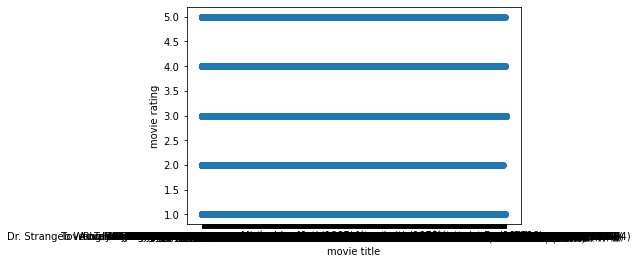

In [50]:
plt.scatter(merge_data['movie_title'],merge_data['movie_rating'])
plt.xlabel('movie title')
plt.ylabel('movie rating')
plt.show()

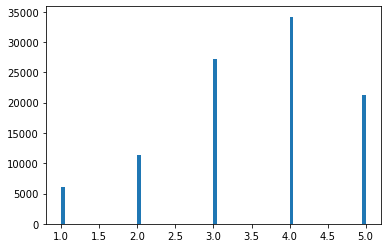

In [51]:
plt.hist(merge_data['movie_rating'],bins=80)
plt.show()

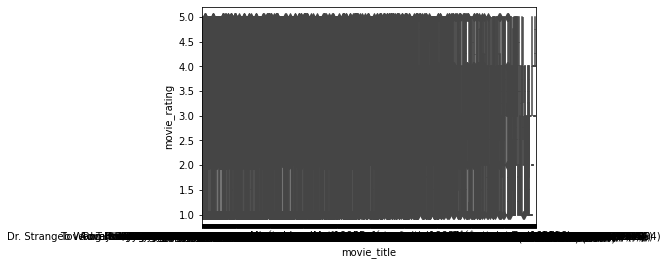

In [55]:
sb.boxplot(x='movie_title',y='movie_rating',data=merge_data)

# Create a movie recommendation

In [59]:
movie_matrix=merge_data.pivot_table(index='user_id',columns='movie_title',values='movie_rating')
movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


# Correlating a movie's rating to movie matrix

<a href="https://www.mathsisfun.com/data/correlation.html#:~:text=When%20two%20sets%20of%20data,decreases%20as%20the%20other%20increases">Correlation</a>

In [62]:
star_wars_movie=movie_matrix['Star Wars (1977)']
star_wars_movie.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [66]:
corr_data=movie_matrix.corrwith(star_wars_movie)
corr_data

C:\Users\abc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\abc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [69]:
corr_data.dropna(axis=0, inplace=False)

movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Length: 1410, dtype: float64

In [70]:
corr_data.sort_values(axis=0,ascending=False).head()

movie_title
No Escape (1994)          1.0
Man of the Year (1995)    1.0
Hollow Reed (1996)        1.0
Commandments (1997)       1.0
Cosi (1996)               1.0
dtype: float64

In [76]:
corr_dataframe=pd.DataFrame(data=corr_data,columns=['Correlation'])
corr_dataframe.head()

,Correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
